# PYTHON SKLEARN: KNN, LinearRegression et Supervised Learning

URL: https://youtu.be/P6kSc3qVph0?si=eZ_jGnDXX5bDMnIX

In [3]:
#importations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

## Regression avec SKLearn

### LinearRegression

In [6]:
#fixer la graine du générateur de nombres aléatoires pour la reproductibilité
#en faisant celà, on obtiendra toujours les mêmes nombres aléatoires (à chaque exécution de ce code)
np.random.seed(0)  

#définir le nombre de points de données  
m = 100  

#créer un tableau de valeurs (uniformément espacées) allant de 0 à 10, avec m points
#reshape(m, 1): transformer le tableau 1D en tableau 2D avec 100 lignes et 1 colonne (m, 1)
#cette étape (reshape(m, 1)) est cruciale pour les modèles de prédiction si on n'a pas un tableau 2D
X = np.linspace(0, 10, m).reshape(m, 1)  

#créer la variable cible y en ajoutant un bruit aléatoire à X  
#np.random.randn(m, 1) génère m valeurs aléatoires suivant une distribution normale standard (Moyenne = 0, Écart-type = 1)
y = X + np.random.randn(m, 1)

#y = X + np.random.randn(m, 1) crée un tableau y qui représente une relation linéaire avec X
#mais avec un bruit aléatoire ajouté

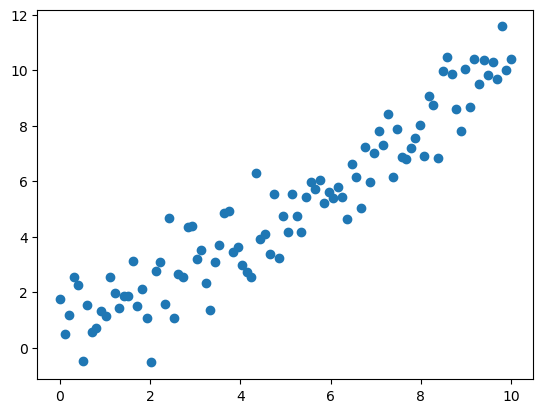

In [7]:
#afficher y = X + np.random.randn(m, 1) avec plt.scatter
plt.scatter(X, y)

- **model.fit(X, y) :** Cette étape entraîne le modèle sur les données d'entrée X et les cibles y. Le modèle apprend la relation entre ces deux ensembles de données.
- **score = model.score(X, y) :** Cette méthode évalue la performance du modèle sur les mêmes données qu'il a utilisées pour s'entraîner. Elle retourne le coefficient de détermination R², qui indique la proportion de la variance de y expliquée par X.

In [9]:
#créer le modèle de régression linéaire  
model = LinearRegression()

#entraîner le model avec la méthode fit() sur les données X et y
model.fit(X, y)


#évaluer le modèle avec la méthode score() sur les mêmes donées (X et y)
model.score(X, y)

0.8881140743377214

In [10]:
#on obtient un score de 88%
#ce score est en fait le coefficient de détermination calculé dans ce cas là
#(= le R^2 de la méthode des moindres carrés)

- **model.predict(X) :** Utilise le modèle entraîné pour effectuer des prédictions sur les données X.

In [12]:
#faire de nouvelles prédictions avec predict() sur les données X  
predictions = model.predict(X)

In [13]:
#ce tableau de numpy contient autant de resultats que dans les données X

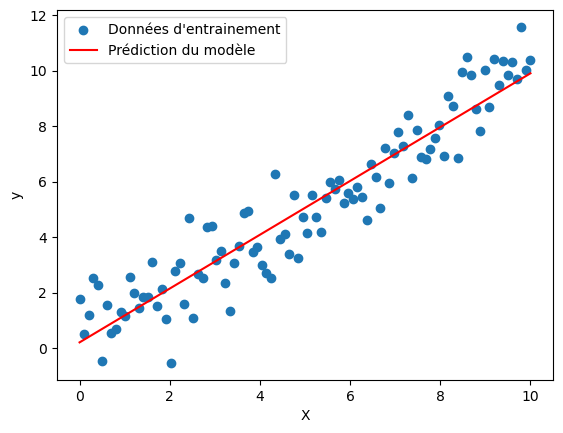

In [14]:
#afficher X en fonction de y avec un nuage de points
plt.scatter(X, y, label='Données d\'entrainement')  
plt.xlabel('X')  # étiquette pour l'axe des abscisses (l'axe des x)
plt.ylabel('y')  # étiquette pour l'axe des ordonnées (l'axe des y)

#tracer la ligne de régression avec les prédictions  
plt.plot(X, predictions, c='r', label='Prédiction du modèle')  

#ajouter une légende au graphique  
plt.legend()

### SVR

In [16]:
#fixer la graine du générateur de nombres aléatoires pour la reproductibilité
#en faisant celà, on obtiendra toujours les mêmes nombres aléatoires (à chaque exécution de ce code)
np.random.seed(0)  

#définir le nombre de points de données  
m = 100  

#créer un tableau de valeurs (uniformément espacées) allant de 0 à 10, avec m points
#reshape(m, 1) transforme le tableau 1D en tableau 2D avec 100 lignes et 1 colonne (m, 1)
#ce qui est généralement requis pour les modèles de régression
X = np.linspace(0, 10, m).reshape(m, 1)  

#créer la variable cible y en ajoutant un bruit aléatoire à X  
#np.random.randn(m, 1) génère m valeurs aléatoires suivant une distribution normale standard (Moyenne = 0, Écart-type = 1)
y = X**2 + np.random.randn(m, 1)

#y = X**2 + np.random.randn(m, 1) crée un tableau y qui représente une relation linéaire avec X
#mais avec un bruit aléatoire ajouté

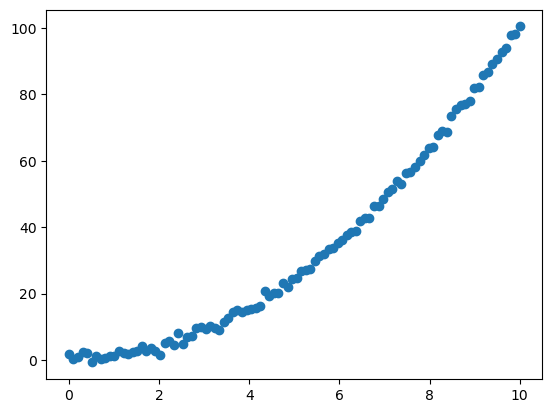

In [17]:
#afficher y = X**2 + np.random.randn(m, 1) avec plt.scatter
plt.scatter(X, y)

- **model = SVR(C=100) :** Ici, on crée une instance du modèle SVR. Le paramètre C contrôle la marge d'erreur. Un C plus élevé cherche à minimiser l'erreur de formation, ce qui peut rendre le modèle plus sensible aux fluctuations (bruit) dans les données.

In [19]:
#créer le modèle de régression à vecteurs de support (SVR)
#avec un paramètre C fixé à 100  
model = SVR(C=100)

#entraîner le model avec la méthode fit() sur les données X et y
model.fit(X, y)


#évaluer le modèle avec la méthode score() sur les mêmes donées (X et y)
model.score(X, y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9989763625652847

In [20]:
#on obtient un score de 99%

In [21]:
#faire de nouvelles prédictions avec predict() sur les données X  
predictions = model.predict(X)

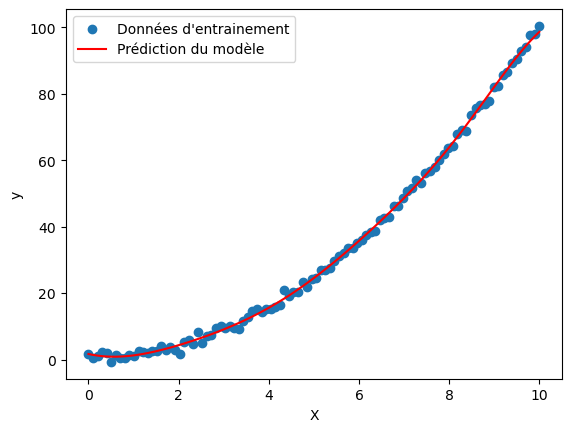

In [22]:
#afficher X en fonction de y avec un nuage de points
plt.scatter(X, y, label='Données d\'entrainement')  
plt.xlabel('X')  # étiquette pour l'axe des abscisses (l'axe des x)
plt.ylabel('y')  # étiquette pour l'axe des ordonnées (l'axe des y)

# Tracer la ligne de régression avec les prédictions  
plt.plot(X, predictions, c='r', label='Prédiction du modèle')  

# Ajouter une légende au graphique  
plt.legend()

## Classification avec SKLearn (KNN)

In [24]:
#charger le dataset du Titanic avec seaborn
titanic = sns.load_dataset('titanic')

#afficher les 5 premières lignes de titanic
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
#la forme de titanic
titanic.shape

(891, 15)

In [26]:
#afficher les colonnes de titanic
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [27]:
#ne laisser que les colonnes 'survived', 'pclass', 'sex' et 'age'
#enregistrer les modifications sous la variable appelée titanic
titanic = titanic[['survived', 'pclass', 'sex', 'age']]

#supprimer les lignes manquantes (axis= 0) et redéfinir titanic après la modification
titanic.dropna(axis= 0, inplace= True)

#changer les valeurs ['male', 'female'] en [0, 1] dans la colonne 'sex'
#et redéfinir la colonne 'sex' après la modification
titanic['sex'].replace(['male', 'female'], [0, 1], inplace= True)

#afficher les 5 premières lignes de titanic
titanic.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_16324\3966887656.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['sex'].replace(['male', 'female'], [0, 1], inplace= True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16324\3966887656.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [28]:
#la forme de titanic
titanic.shape

(714, 4)

- on développe un modèle de classification pour déterminer si un passager du Titanic va survivre ou non.

In [30]:
#créer le modèle de classification  
model = KNeighborsClassifier()

In [31]:
#il faut entraîner le modèle sur des données x et y
#ici on a pas de données x et y, on a un seul tableau
#on divise alors ce tableau en 2 tableaux:
#tableau y de la cible (target), ici ce sera la colonne 'survived'
#un tableau X qui contient le reste du tableau (à l'exception de la colonne 'survived')

In [32]:
#créer le tableau y de la cible (target), ici ce sera la colonne 'survived'
y= titanic['survived']

#créer un tableau X qui contient le reste du tableau (à l'exception de la colonne 'survived')
#on supprime la colonne 'survived' des colonnes (axis=1) de titanic
X= titanic.drop('survived', axis=1)

In [33]:
#afficher X
X

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [34]:
#afficher y
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [35]:
#entraîner le model avec la méthode fit() sur les données X et y
model.fit(X, y)

#évaluer la performance du modèle avec la méthode score() sur les mêmes donées (X et y)
model.score(X, y)

0.8417366946778712

In [36]:
#on obtient une précision de 84%
#c'est à dire que 84% du temps, notre modèle effectue une bonne prédiction (de la survie du passager)

In [37]:
#faire de nouvelles prédictions avec predict() sur les données X
#pour voir les passagers qui ont survécut ou  non
predictions = model.predict(X)

- On écrit une **fonction pour déterminer, si une personne**, à bors du titanic, **a survécut**.

In [39]:
def survie(model, pclass=3, sex=0, age=26):  
    #créer un tableau numpy avec les caractéristiques de l'individu  
    x = np.array([pclass, sex, age]).reshape(1, 3)  
    
    # faire une prédiction sur les chances de survie de l'individu  
    prediction = model.predict(x)  
    
    #afficher la prédiction  
    print(prediction)

In [40]:
"""
- Définition de la Fonction survie 

La fonction survie(model, pclass=3, sex=0, age=26):
définit un modèle de prédiction de survie avec des paramètres par défaut.
Les paramètres incluent:
* pclass: La classe de l'individu (1, 2 ou 3), avec une valeur par défaut de 3 (3ème classe).
* sex: Le sexe de l'individu (0 pour male, 1 pour female), avec une valeur par défaut de 0 (male).
* age: L'âge de l'individu, avec une valeur par défaut de 26 (26 ans).

- Création de l'Array d'Entrée:

x = np.array([pclass, sex, age]).reshape(1, 3):
Cette ligne crée un tableau NumPy contenant les caractéristiques de l'individu.
Reshape(1, 3) transforme le tableau de 1D en une forme de 1 ligne et 3 colonnes, càd 2D
qui est le format qu'il faut avoir pour les prédictions du modèle.

Remarque:
def survie(model, pclass=3, sex=0, age=26)
x = np.array([pclass, sex, age])
les paramètres suivant le même ordre dans la définition de la fonction et 

"""

"\n- Définition de la Fonction survie \n\nLa fonction survie(model, pclass=3, sex=0, age=26):\ndéfinit un modèle de prédiction de survie avec des paramètres par défaut.\nLes paramètres incluent:\n* pclass: La classe de l'individu (1, 2 ou 3), avec une valeur par défaut de 3 (3ème classe).\n* sex: Le sexe de l'individu (0 pour male, 1 pour female), avec une valeur par défaut de 0 (male).\n* age: L'âge de l'individu, avec une valeur par défaut de 26 (26 ans).\n\n- Création de l'Array d'Entrée:\n\nx = np.array([pclass, sex, age]).reshape(1, 3):\nCette ligne crée un tableau NumPy contenant les caractéristiques de l'individu.\nReshape(1, 3) transforme le tableau de 1D en une forme de 1 ligne et 3 colonnes, càd 2D\nqui est le format qu'il faut avoir pour les prédictions du modèle.\n\nRemarque:\ndef survie(model, pclass=3, sex=0, age=26)\nx = np.array([pclass, sex, age])\nles paramètres suivant le même ordre dans la définition de la fonction et \n\n"

In [41]:
#faire appel à la fonction
survie(model)

[0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [42]:
#la personne n'a pas survécu

- On calculer la probabilité qu'on appartient à la classe 0 ou à la classe 1.

Il exixte pour celà la méthode **predict_proba()** (model.predict_proba(X)) trouvée **dans certains modèles de ML mais pas tous**.

In [44]:
def survie(model, pclass=3, sex=0, age=26):  
    #créer un tableau NumPy avec les caractéristiques de l'individu  
    x = np.array([pclass, sex, age]).reshape(1, 3)  
    
    #faire une prédiction sur les chances de survie de l'individu  
    prediction = model.predict(x)  
    
    #afficher la prédiction  
    print(f"Prédiction de survie (0 = Non, 1 = Oui): {prediction[0]}")  
    
    #prédire les probabilités pour le même individu  
    probabilities = model.predict_proba(x)  
    
    #afficher les probabilités de chaque classe (0 et 1)  
    print(f"Probabilités de survie (non, oui): {probabilities[0]}")

In [45]:
#faire appel à la fonction
survie(model)

Prédiction de survie (0 = Non, 1 = Oui): 0
Probabilités de survie (non, oui): [0.8 0.2]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [46]:
#0: la personne n'a pas survécu
#[0.8 0.2]:
#la personne a 80% de chance d'appartenir à la classe 0 (qui n'ont pas suvécu)
#et 20% de chance d'appartenir à la classe 1 (qui ont suvécu)
#ça explique la prédiction de survie (ici 0, càd ne pas survivre au naufrage)